# Business Understanding

## Business Overview

Vaccination is one of the most effective public health measures for preventing the spread of infectious diseases. In recent years, there has been the development of vaccines for other pandemics such as COVID-19. Vaccination not only helps individuals who have been immunised but also the community from the wider spread of the virus.

For this study, we are using data from a survey conducted in 2009 during the H1N1 influenza pandemic, also known as the "swine flu". This led to an estimated death toll worldwide in its first year of between 151,000 and 575,000. To reduce this, a vaccine was introduced in late 2009 alongside the seasonal flu that was already available.

The survey was used to understand the uptake of both vaccines. These included respondents sharing information on their health conditions, demographics, risk perception, and behaviours. By analyzing this dataset, we can better understand which factors influenced vaccine uptake. These insights can help healthcare professionals design more effective, targeted campaigns to improve vaccine acceptance and coverage in future pandemics.

## Stakeholder

- Public heathcare Organisation

## Problem Statement

- Public health agencies face the challenge of running vaccination campaigns with limited resources. A general, untargeted approach is inefficient and does not effectively address the unique factors that influence vaccination in different groups of people.
- The key challenge is the lack of a proactive approach to identifying individuals who are least likely to get vaccinated, and understanding the specific reasons behind their choices. This results in lower vaccination rates and poses a greater risk to public health.

## Business Objectives

### Main Objective

- The main goal is to create a data-driven strategy that increases H1N1  vaccination by supporting targeted and personalized public health interventions.

### Specific Objectives

1. **Predict Vaccine Acceptance:** To come up with a classification model that can predict if a person will receive the H1N1 vaccine based on past behaviour.
   
2. **Identify At-Risk Populations:** To accurately segment the population and predict which individuals have a high probability of remaining unvaccinated for H1N1.

3. **Understand Key Drivers:** To determine the most influential factors (e.g., opinions, behaviors, demographics, access to care) that predict vaccine hesitancy and acceptance.

4. **Compare the performance of different machine learning models:** To determine the most effective technique for vaccine uptake prediction.


## Research Questions

1. What is the probability that an individual will receive the H1N1 vaccine based on their reported opinions, behaviors, and demographic profile?

2. Which distinct segments of the population have the highest predicted probability of remaining unvaccinated, and what are their defining characteristics?

3. Which factors are the strongest predictors of vaccine acceptance and hesitancy? Specifically, how much do a doctor's recommendation, perceived vaccine effectiveness, and health insurance status influence the decision?

4. How can we prioritize demographic groups for intervention based on their density of high-risk, vaccine-hesitant individuals to maximize the impact of limited public health resources?

## Project Goals

 - The main goal of the project is to create and test a reliable binary classification model for H1N1 vaccine that predicts whether a person is likely to get vaccinated based on their survey answers.
 - A secondary goal is to study the model to give clear insights into the factors that influence these predictions.

## Success Criteria

- Model Performance: The model is successful if it gets a recall above 0.70 and keeps a good balance between precision and recall on the test set.
- Actionable Insights: Success includes showing the top features that drive vaccination and explaining them clearly to stakeholders.

# Data Understanding

## Data Source & Description
- **Source:** This dataset is from the National 2009 H1N1 Flu Survey (NHFS), conducted by the Centers for Disease Control and Prevention (CDC). It is publicly available and commonly used in data science projects. For more info about the data follow this link: https://www.drivendata.org/competitions/66/flu-shot-learning/
  
- **Description:** The dataset has survey answers from 26,707 people in the U.S. Each row shows a person's attitudes, beliefs, and behaviors regarding the H1N1 and seasonal flu viruses and their vaccines. Our target is to predict whether a person got the H1N1 vaccine. 


- **Suitability:** This dataset is perfect for this business problem as it has many predictors that displays clearly the factors that influence one to get vaccinated or not:

    - Opinions & Knowledge: Perceived risk, effectiveness, and side effects, `h1n1_concern`, `h1n1_knowledge`.

    - Behaviors: like `behavioral_face_mask`, `behavioral_wash_hands`, and `behavioral_large_gatherings`.

    - Demographics: `Age`, `income`, `race`, `health insurance status`, and `geographic region`.

    - External Influence: Doctor's recommendations and employment in healthcare `doctor_recc_h1n1`.
 

      
By modeling this data, we can directly address the objectives of identifying at-risk populations, understanding key drivers, and informing targeted strategies.


## Initial Data Loading and Exploration

In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt 
import seaborn as sns

# For modelling
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [23]:
# Loading the features and target datasets
features_df = pd.read_csv('Data/seasonal_flu_training_set_features.csv')
target_df = pd.read_csv('Data/seasonal_flu_training_set_labels.csv')

In [24]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [25]:
# checking if the index columns are the same in order to merge
assert features_df.index.equals(target_df.index)

In [26]:
# Merging the features and targets on the respondent_id key
df = pd.merge(features_df, target_df, on='respondent_id')

In [27]:
# the shape of the merged dataframe
df.shape

(26707, 38)

- The dataset contains 26,707 rows and 38 columns, that is  1 ID, 36 features and 2 target columns.

In [29]:
# Displaying the first 5 rows to inspect the data
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [30]:
# Getting a summary of the DataFrame including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

- 23 columns are of type float64
- 2 columns are of type int64
- 12 columns are of type object

In [32]:
# Checking for null values
df.isna().sum().to_frame().sort_values(0,ascending = False)


,0
employment_occupation,13470
employment_industry,13330
health_insurance,12274
income_poverty,4423
doctor_recc_h1n1,2160
doctor_recc_seasonal,2160
rent_or_own,2042
employment_status,1463
marital_status,1408
education,1407


- Many columns have a few hundred missing entries this is manageable.
- Columns that have extreme null values are:
    - `employment_industry` and `employment_occupation` are each missing over 13,000 entries around 50% of the data
    - `health_insurance` is missing 12,274 entries that is around 46% of the data.
    - `income_poverty` is missing over 4,400 entries
    -  `doctor_recc_h1n1` and `doctor_recc_seasonal` are missing over 2,100 entries each.
- We’ll need a smart way to fill in the missing values, because deleting those rows would throw away a lot of useful data.

In [34]:
# Generating descriptive statistics for numerical columns
df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


- The min and max values for most float64 columns like `h1n1_concern`are 0 to 3, `opinion_h1n1_vacc_effective`: 1 to 5, after a bit of research we came to the conclusion this columns uses **ordinal scale** which is something like
  - 1 = `Strongly disagree`
  - 2 = `Disagree`
  - 3 = `Neutral`
  - 4 =  `Agree`
  - 5 = `Strongly agree`
    - This  is important to note **especially when deciding how to handle and encode them.**


- The means of the target variables show a significant class imbalance. Only 21.2% of respondents received the H1N1 vaccine (`h1n1_vaccine` mean = 0.212), and 46.6% received the seasonal (`vaccine seasonal_vaccine` mean = 0.466).

- This strongly validates the plan to use AUC-ROC and Precision-Recall curves for evaluation instead of accuracy.

- Also this is why we decided to focus on `h1n1_vaccine` as the target variable rather than `vaccine seasonal_vaccine` as the latter has a much lower class imbalance

In [36]:
# Descriptive stats for object columns
df.describe(include=['object'])

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
count,26707,25300,26707,26707,22284,25299,24665,25244,26707,26707,13377,13237
unique,5,4,4,2,3,2,2,3,10,3,21,23
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",fcxhlnwr,xtkaffoo
freq,6843,10097,21222,15858,12777,13555,18736,13560,4297,11645,2468,1778


In [37]:
#  number of unique categories per column
df.select_dtypes(include='object').nunique().sort_values(ascending=False)

employment_occupation    23
employment_industry      21
hhs_geo_region           10
age_group                 5
education                 4
race                      4
income_poverty            3
employment_status         3
census_msa                3
sex                       2
marital_status            2
rent_or_own               2
dtype: int64

- The number of unique categories per column is reasonable, but encoding them will increase complexity

- `employment_industry` and `employment_occupation` have 21 and 23 unique categories, respectively.

- `hhs_geo_region` has 10 unique codes.


## Exploratory Data Analysis (EDA)

### Univariate Analysis

**What  is the distribution of the two target variables?**

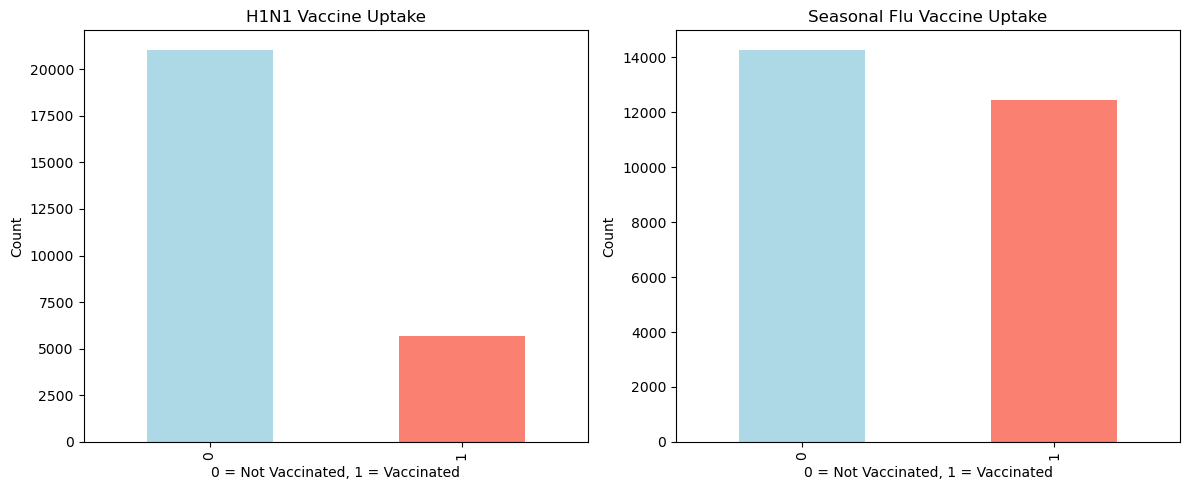

H1N1 Vaccine: 21.25% vaccinated.
Seasonal Vaccine: 46.56% vaccinated.


In [42]:
# Plot distribution of vaccine uptake
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# H1N1 Vaccine
df['h1n1_vaccine'].value_counts().plot(
    kind='bar', color=['lightblue', 'salmon'], ax=axes[0]
)
axes[0].set_title('H1N1 Vaccine Uptake')
axes[0].set_xlabel('0 = Not Vaccinated, 1 = Vaccinated')
axes[0].set_ylabel('Count')

# Seasonal Vaccine
df['seasonal_vaccine'].value_counts().plot(
    kind='bar', color=['lightblue', 'salmon'], ax=axes[1]
)
axes[1].set_title('Seasonal Flu Vaccine Uptake')
axes[1].set_xlabel('0 = Not Vaccinated, 1 = Vaccinated')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Print percentages
print(f"H1N1 Vaccine: {df['h1n1_vaccine'].mean() * 100:.2f}% vaccinated.")
print(f"Seasonal Vaccine: {df['seasonal_vaccine'].mean() * 100:.2f}% vaccinated.")


#### Observation on Class Balance:

- **H1N1 Vaccine:** Only 21.2% of respondents got the H1N1 vaccine, showing a strong imbalance. A model that always predicts “not vaccinated” would be 79% accurate but unhelpful. This means we should use metrics like AUC-ROC, F1-score, and Precision-Recall curves instead of accuracy.

- **Seasonal Flu Vaccine:** About 46.6% of respondents got the seasonal flu vaccine, showing a mild imbalance. Accuracy is still misleading, so AUC-ROC is a better choice for evaluation.

**What is the distribution of key features?**

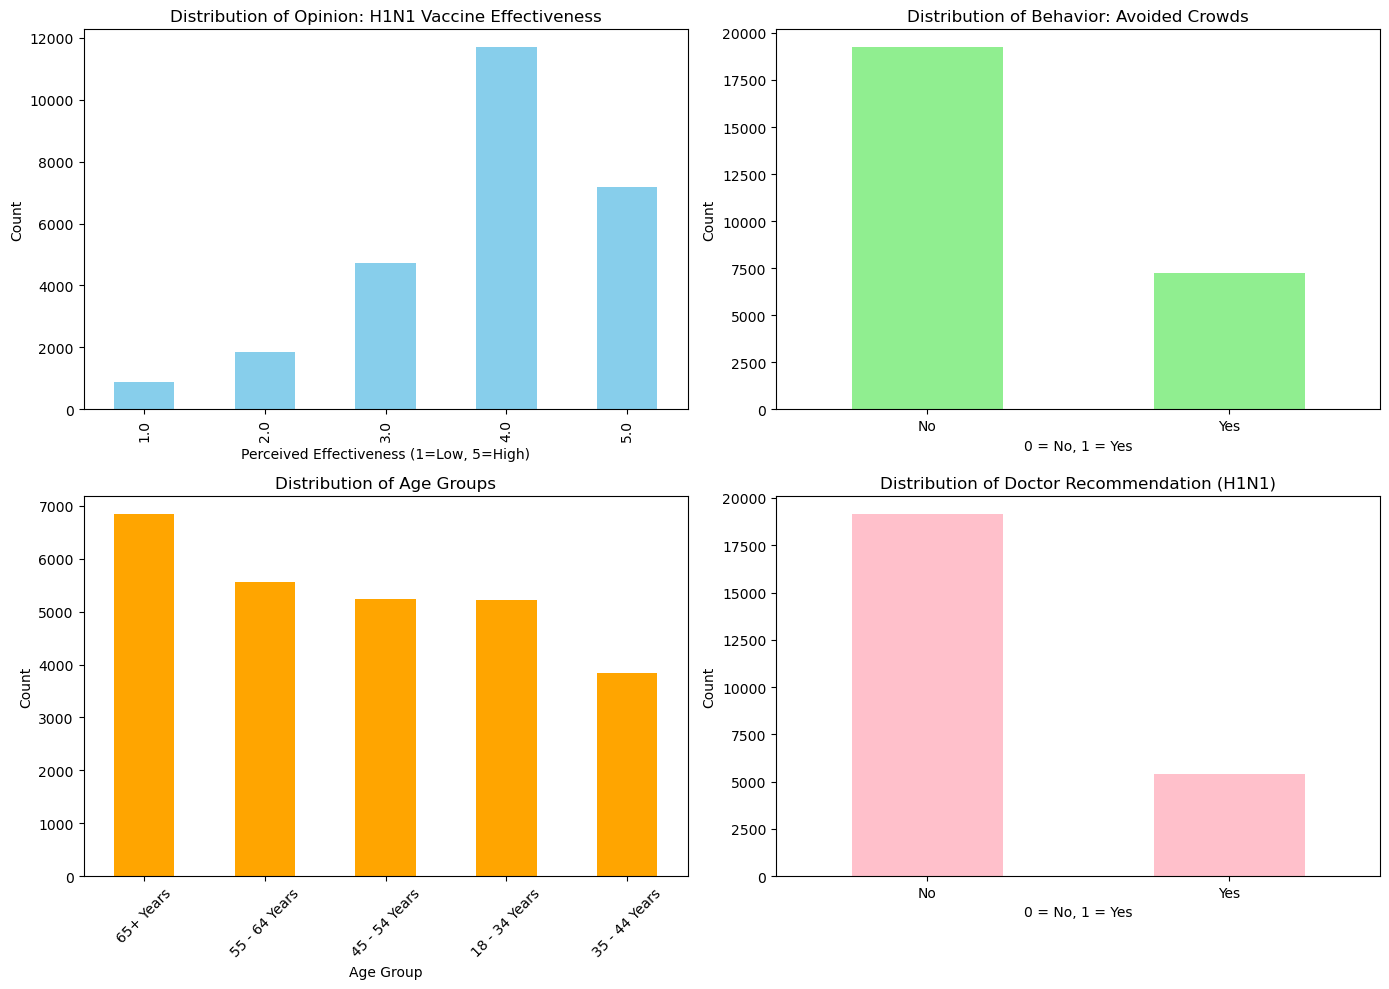

In [45]:
# Set up the figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Opinion Feature: opinion_h1n1_vacc_effective
df['opinion_h1n1_vacc_effective'].value_counts().sort_index().plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Distribution of Opinion: H1N1 Vaccine Effectiveness')
axes[0,0].set_xlabel('Perceived Effectiveness (1=Low, 5=High)')
axes[0,0].set_ylabel('Count')

# 2. Behavioral Feature: behavioral_avoidance
df['behavioral_avoidance'].value_counts().plot(kind='bar', ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Distribution of Behavior: Avoided Crowds')
axes[0,1].set_xlabel('0 = No, 1 = Yes')
axes[0,1].set_ylabel('Count')
axes[0,1].set_xticks([0, 1])
axes[0,1].set_xticklabels(['No', 'Yes'], rotation=0)

# 3. Demographic Feature: age_group
df['age_group'].value_counts().plot(kind='bar', ax=axes[1,0], color='orange')
axes[1,0].set_title('Distribution of Age Groups')
axes[1,0].set_xlabel('Age Group')
axes[1,0].set_ylabel('Count')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Doctor Recommendation: doctor_recc_h1n1
df['doctor_recc_h1n1'].value_counts().plot(kind='bar', ax=axes[1,1], color='pink')
axes[1,1].set_title('Distribution of Doctor Recommendation (H1N1)')
axes[1,1].set_xlabel('0 = No, 1 = Yes')
axes[1,1].set_ylabel('Count')
axes[1,1].set_xticks([0, 1])
axes[1,1].set_xticklabels(['No', 'Yes'], rotation=0)

plt.tight_layout()
plt.show()

#### Observations on Key Features:

- **Opinion:** The distribution of `opinion_h1n1_vacc_effective` is left-skewed. Most people believe the vaccine is somewhat to very effective (scores 3-5), and a small portion has low perceived effectiveness (scores 1-2).

- **Behaviour:** A majority of respondents `behavioral_avoidance` majority of respondents reported that they did not avoid crowds

- **Demographic:** The age_group distribution is fairly balanced, with a good representation from all adult age brackets. The "65+ Years" group is the largest.Demographic, followed by those in the 55–64 years range, while the 35–44 years group is the smallest.

- **Doctor's Recommendation:** Most people did not receive a doctor's recommendation for the H1N1 vaccine `doctor_recc_h1n1`. This is a key potential barrier.

#### Bi-variate analysis

**Features vs. Target:**

- Analyzing how some of these key features relate to the target variable `h1n1_vaccine`.

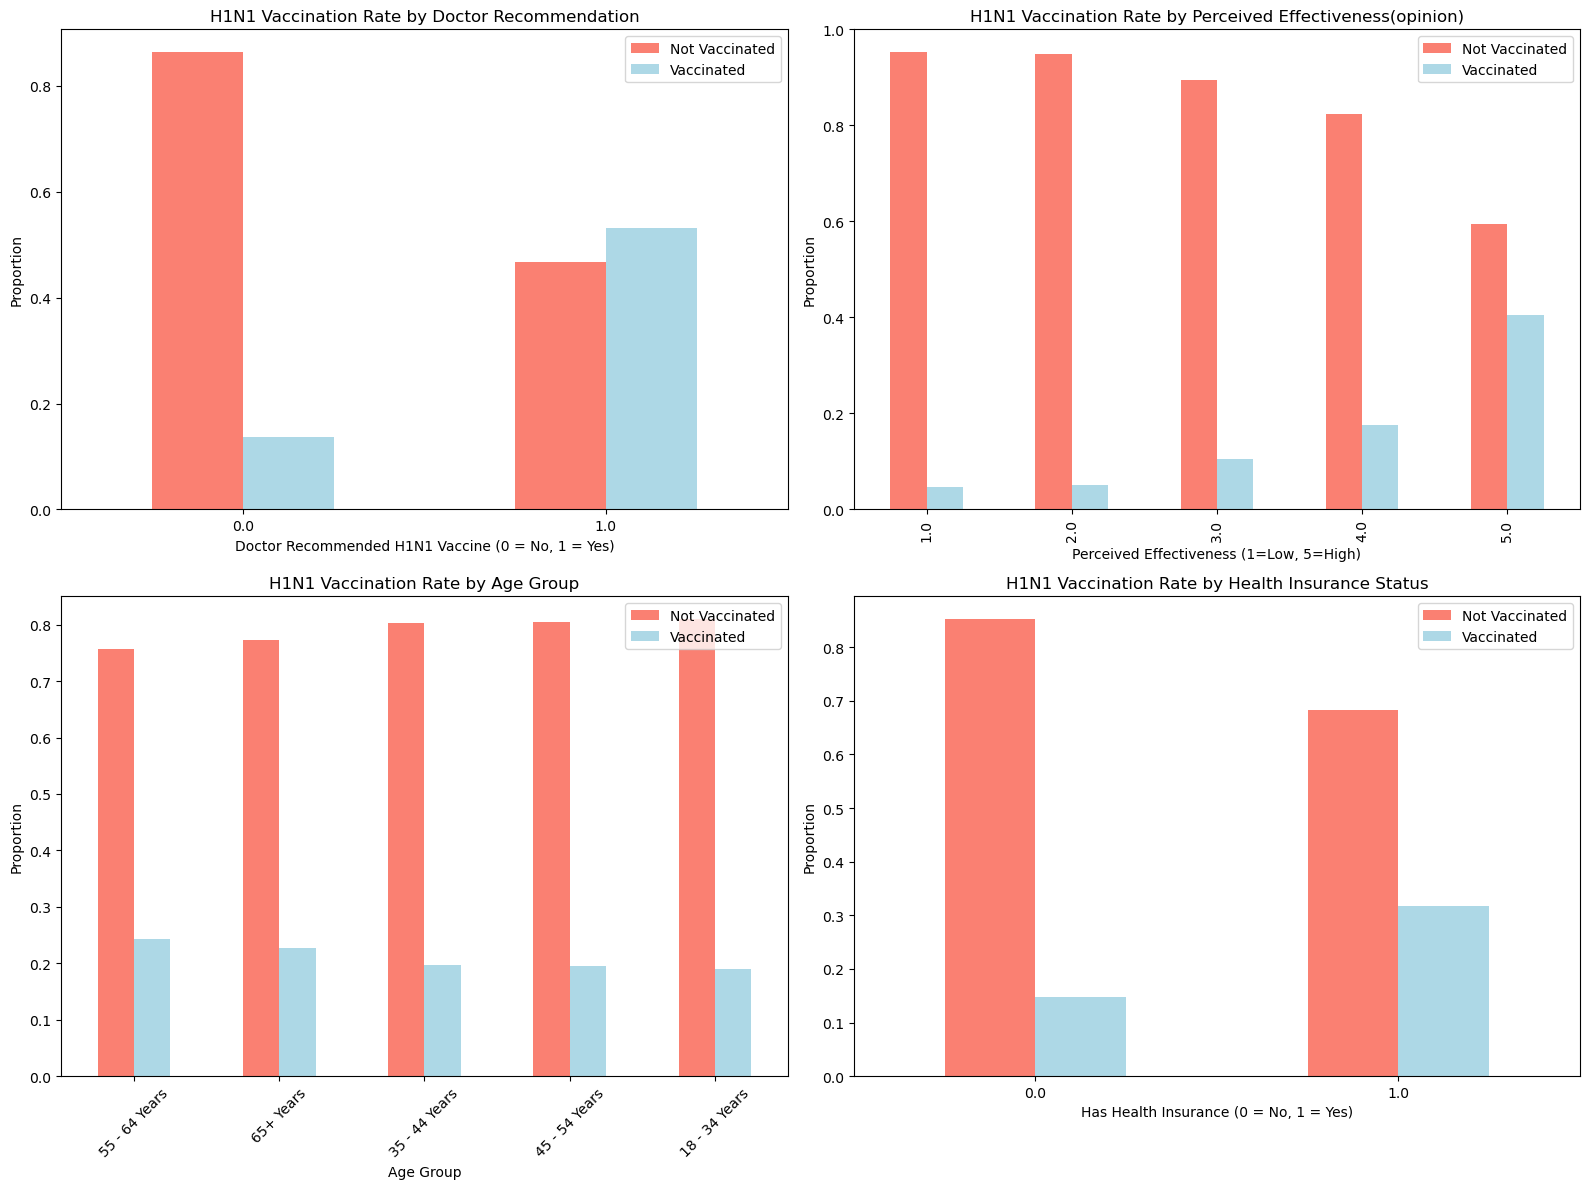

In [50]:
# Analyze the relationship between key features and H1N1 vaccination
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Doctor's Recommendation vs. Vaccination
pd.crosstab(df['doctor_recc_h1n1'], df['h1n1_vaccine'], normalize='index').plot(kind='bar', ax=axes[0,0], color=['salmon', 'lightblue'])
axes[0,0].set_title('H1N1 Vaccination Rate by Doctor Recommendation')
axes[0,0].set_xlabel('Doctor Recommended H1N1 Vaccine (0 = No, 1 = Yes)')
axes[0,0].set_ylabel('Proportion')
axes[0,0].legend(['Not Vaccinated', 'Vaccinated'])
axes[0,0].tick_params(axis='x', rotation=0)

# 2. Opinion on Effectiveness vs. Vaccination
pd.crosstab(df['opinion_h1n1_vacc_effective'], df['h1n1_vaccine'], normalize='index').plot(kind='bar', ax=axes[0,1], color=['salmon', 'lightblue'])
axes[0,1].set_title('H1N1 Vaccination Rate by Perceived Effectiveness(opinion)')
axes[0,1].set_xlabel('Perceived Effectiveness (1=Low, 5=High)')
axes[0,1].set_ylabel('Proportion')
axes[0,1].legend(['Not Vaccinated', 'Vaccinated'])

# 3. Age Group vs. Vaccination
pd.crosstab(df['age_group'], df['h1n1_vaccine'], normalize='index').sort_values(by=1, ascending=False).plot(kind='bar', ax=axes[1,0], color=['salmon', 'lightblue'])
axes[1,0].set_title('H1N1 Vaccination Rate by Age Group')
axes[1,0].set_xlabel('Age Group')
axes[1,0].set_ylabel('Proportion')
axes[1,0].legend(['Not Vaccinated', 'Vaccinated'])
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Health Insurance vs. Vaccination
pd.crosstab(df['health_insurance'], df['h1n1_vaccine'], normalize='index').plot(kind='bar', ax=axes[1,1], color=['salmon', 'lightblue'])
axes[1,1].set_title('H1N1 Vaccination Rate by Health Insurance Status')
axes[1,1].set_xlabel('Has Health Insurance (0 = No, 1 = Yes)')
axes[1,1].set_ylabel('Proportion')
axes[1,1].legend(['Not Vaccinated', 'Vaccinated'])
axes[1,1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

#### Observations on relationships between key features and the target variable

- `doctor_recc_h1n1`: This is likely the most important factor. People who received a doctor’s advice were much more likely to get vaccinated, while those without a recommendation rarely did. This shows the strong influence of healthcare providers.

- `opinion_h1n1_vacc_effective`: Vaccination rates rose clearly when people believed the vaccine was effective. This shows the need to fight misinformation and build public confidence in vaccines.

- `Age Group:` Older adults, especially those aged 65 and above, had higher vaccination rates compared to younger adults. This reflects risk-based behavior since older people face more health risks from the flu.

- `health_insurance`: People with health insurance were more likely to be vaccinated than those without. This suggests that access to healthcare plays an important role in vaccination.

# Data Preparation

## Data Cleaning

In [54]:
# Check for duplicates
df.duplicated().sum()

0

- No duplicate rows were found, so no action was needed.

In [56]:
# Analyze missing values pattern
df.isna().sum().to_frame().sort_values(0,ascending = False)

,0
employment_occupation,13470
employment_industry,13330
health_insurance,12274
income_poverty,4423
doctor_recc_h1n1,2160
doctor_recc_seasonal,2160
rent_or_own,2042
employment_status,1463
marital_status,1408
education,1407


- Many columns have a few hundred missing entries this is manageable.
- Columns that have extreme null values are:
    - `employment_industry` and `employment_occupation` are each missing over 13,000 entries around 50% of the data
    - `health_insurance`is missing 12,274 entries that is around 46% of the data.
    - `income_poverty` is missing over 4,400 entries
    -  `doctor_recc_h1n1` and `doctor_recc_seasonal` are missing over 2,100 entries each.
- We’ll need a smart way to fill in the missing values, because deleting those rows would throw away a lot of useful data.

Handle missing values based on our analysis:

- Droping columns with >40% missing data `employment_industry`, `employment_occupation`and `health_insurance`. 
- For other columns, we will use appropriate replacement: **median** for numerical, **mode** for categorical

In [59]:
# Dropping columns with high missing values
df_clean = df.drop(columns=['employment_industry', 'employment_occupation', 'health_insurance'])

In [60]:
# replacing missing numerical values with median
numerical_cols = df_clean.select_dtypes(include=['float64']).columns

for col in numerical_cols:
    df_clean[col].fillna(df_clean[col].median(), inplace=True)

In [61]:
# replacing missing categorical features with mode
categorical_cols = df_clean.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

In [62]:
# Verify no missing values remain
df_clean.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

- **Duplicate Rows:** No duplicate rows were found, so we left it as it is.

- **Columns with high missing values:** `health_insurance`, `employment_industry` and `employment_occupation` had more than 40% missing data. These columns were dropped as imputing them would introduce significant bias and another reason is that these columns were not considered critical predictors based on our EDA.

- **Other Numerical Features:** Missing values were filled with the median, because outliers does not affect it.

- **Categorical Features:** Missing values were filled with the mode (the most frequent category) to maintain the distribution.


## Feature Engineering & Selection

In this step we have created new features and removed some old ones as we have seen the dataset contains many columns, and some of them are similar or say the same thing.  
To make our modeling easier especially with Logistic Regression, which works better with fewer and clearer features, we combined related columns into simpler columns:

- **Opinion Scores:** Instead of keeping three separate columns about opinions on each vaccine (effectiveness, risk, and fear of side effects), we have combine them into one score. This gives an easy to interpret measure of how positive or negative a person’s opinion is toward vaccination. 

- **Prevention Index:** There are several behavioural columns (washing hands, wearing masks, avoiding crowds). Instead of using each separately, we sum them into one column that shows how many preventive actions a person reported.  

After creating these new combined features, we drop the original columns and identifiers like `respondent_id` so our model will be cleaner, less noisy, and easier to train.


### Opinion Scores
We created **`h1n1_opinion_score`** by combining three columns:  

- **`opinion_h1n1_vacc_effective`** Added perceived effectiveness of the vaccine  
- **`opinion_h1n1_risk`** Added perceived risk of H1N1  
- **`opinion_h1n1_sick_from_vacc`** Subtracted fear of getting sick from the vaccine  

This gives one clear score of a person’s attitude toward the H1N1 vaccine.  
Higher = more positive attitude, Lower = more negative attitude.


In [67]:
# Opinion scores (higher = one thinks vaccine is good + risk of h1n1 is high, lower if afraid of getting sick from vaccine)
df_clean['h1n1_opinion_score'] = (
    df_clean['opinion_h1n1_vacc_effective']
    + df_clean['opinion_h1n1_risk']
    - df_clean['opinion_h1n1_sick_from_vacc']
)
df_clean['h1n1_opinion_score'].value_counts()

h1n1_opinion_score
 4.0    7566
 5.0    4844
 3.0    4012
 2.0    3112
 6.0    1981
 1.0    1827
 7.0    1119
 8.0     837
 0.0     633
-1.0     284
 9.0     260
-2.0     156
-3.0      76
Name: count, dtype: int64

### Prevention Index
We created **`prevention_index`** by adding up all the preventive behaviors (like wearing a mask, washing hands, avoiding crowds, etc)  

This gives one number that shows how many safety steps a person takes:  
- Higher value = more preventive behaviours  
- Lower value = fewer preventive behaviours  


In [69]:
# Prevention index = how many preventive behaviors a person reports
behavioral_cols = [
    'behavioral_antiviral_meds',
    'behavioral_avoidance',
    'behavioral_face_mask',
    'behavioral_wash_hands',
    'behavioral_large_gatherings',
    'behavioral_outside_home',
    'behavioral_touch_face',
]
df_clean['prevention_index'] = df_clean[behavioral_cols].sum(axis=1)

df_clean['prevention_index'].value_counts()

prevention_index
3.0    7331
2.0    4568
5.0    4546
4.0    4335
1.0    2656
0.0    2060
6.0    1040
7.0     171
Name: count, dtype: int64

### Dropping some features
We dropped some columns before modeling:  

- **ID**: `respondent_id` - not useful for prediction.  
- **Original doctor, opinion, and behavior columns** - already combined into simpler features.  
- **Geography codes** - anonymized and not meaningful for this analysis.  
- **Target column** `h1n1_vaccine` - this is what we want to predict, not an input.
  
- **`seasonal_vaccine`** column is dropped because:  
    - Our main goal is to take on the **greater challenge of class imbalance** only 21% got the H1N1 vaccine as seen while doing EDA.   

This leaves us with a cleaner feature set of `X` that is easier for the model to use.  


In [71]:
# Picking features for modeling, dropping IDs and things we replaced

# Columns we don't want to use as features:
# - respondent_id: just an ID
# - original doctor/opinion/behavior columns: replaced by our simpler combined features
# - some geography codes that are anonymized and not easy to explain here
drop_columns = [
    'respondent_id',
    'doctor_recc_seasonal',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'hhs_geo_region',
    'census_msa',
] + behavioral_cols

# Building X by dropping the columns above and the target column and 'seasonal_vaccine'
X = df_clean.drop(columns=drop_columns + ["h1n1_vaccine", "seasonal_vaccine"])

X.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status',
       'household_adults', 'household_children', 'h1n1_opinion_score',
       'prevention_index'],
      dtype='object')

In [72]:

# Build y target
y_h1n1 = df_clean["h1n1_vaccine"]

y_h1n1

0        0
1        0
2        0
3        0
4        0
        ..
26702    0
26703    0
26704    0
26705    0
26706    0
Name: h1n1_vaccine, Length: 26707, dtype: int64

##  Train-Test Split

We split the data into **training (80%)** and **testing (20%)** sets.  
- We used **stratified sampling**, which means the split keeps the same class balance (vaccinated vs. not vaccinated) in both sets.  
- This is important because our target (`h1n1_vaccine`) is **highly imbalanced**.  
- Without stratification, one set might have too few vaccinated cases, making training or evaluation unreliable.  

Now we will train the model on the training set and test it on the test set.  


In [75]:
# Performing stratified split for H1N1 target
X_train, X_test, y_train, y_test = train_test_split(X, y_h1n1, test_size=0.2, random_state=42, stratify=y_h1n1)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Class distribution in training set: {pd.Series(y_train).value_counts(normalize = True).values}")
print(f"Class distribution in test set: {pd.Series(y_test).value_counts(normalize = True).values}")

Training set: 21365 samples
Test set: 5342 samples
Class distribution in training set: [0.78754973 0.21245027]
Class distribution in test set: [0.78753276 0.21246724]


## Preprocessing

We will clean and prepare the features so they can be used in modeling:  
- Fill missing values (median for numbers, most frequent for categories).  
- Scale numerical features.  
- One-hot encode categorical features.  
- Fit transformations on training data only to avoid data leakage.  


### Identfying Column Types  

We will separate the features into two groups:  
- **Numerical columns** (integers and floats)  
- **Categorical columns** (object)  

This will help us apply the right preprocessing steps to each group, for numerical we will scale them and for catergorical we will hot-encode them


In [79]:
# Finding numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

### Numerical Features Preprocessing  

For numerical columns:  
- We will impute missing values using the **median**. we had already done this but will do it again to catch any remaining missing values 
- Scale values using **StandardScaler** so all numbers are on the same range.  


In [81]:
# Filling missing values with the median
# Scaling them so they are on the same range
num_imputer = SimpleImputer(strategy='median') #*
scaler = StandardScaler()

### Categorical Features Preprocessing  

For categorical columns:  
- Filling missing values with the **most frequent category (mode)**.we had already done this but will do it again to catch any remaining missing values
- Convert categories into **0/1 columns** using One-Hot Encoding.  


In [83]:
# Fill missing values with the most frequent (most common)
# Convert categories into 0/1 columns
cat_imputer = SimpleImputer(strategy='most_frequent')
onehot = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')

### Combining the Preprocessing Steps  

We use **ColumnTransformer** to apply:  
- `StandardScaler` to all numerical columns.  
- `OneHotEncoder` to all categorical columns.  

This builds one preprocessor that handles both types in a single step.  

In [85]:
# ColumnTransformer applies the right steps to each column type
preprocessor = ColumnTransformer(transformers=[
                                            ('num', StandardScaler(), numerical_cols),
                                            ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'), categorical_cols)
                                                ])

### Fitting training data and transforming Train and Test Data  

- The preprocessor is fitted only on the training data to prevent data leakage
- Then we use it to transform both **train** and **test**.  
This way, the model sees data that’s been cleaned and prepared in the same way, while preventing data leakage.  


In [87]:
# Fitting only on training data
preprocessor.fit(X_train)

# Transforming train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

### Getting Final Feature Names
- Feature names are preserved after one-hot encoding for interpretability 


In [89]:
# Getting final feature names
onehot_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([numerical_cols, onehot_columns])

### Creating DataFrames  
- We converted the processed NumPy arrays back into Pandas DataFrames, adding the correct feature names and row indexes.  
- This makes the data easier to explore and understand before modeling. 

In [91]:
# Created DataFrames for easier inspection
X_train_processed_df = pd.DataFrame(X_train_processed, columns=all_feature_names, index=X_train.index)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=all_feature_names, index=X_test.index)
X_train_processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21365 entries, 20417 to 26118
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   h1n1_concern                          21365 non-null  float64
 1   h1n1_knowledge                        21365 non-null  float64
 2   doctor_recc_h1n1                      21365 non-null  float64
 3   chronic_med_condition                 21365 non-null  float64
 4   child_under_6_months                  21365 non-null  float64
 5   health_worker                         21365 non-null  float64
 6   household_adults                      21365 non-null  float64
 7   household_children                    21365 non-null  float64
 8   h1n1_opinion_score                    21365 non-null  float64
 9   prevention_index                      21365 non-null  float64
 10  age_group_35 - 44 Years               21365 non-null  float64
 11  age_group_45 - 5

In [92]:
X_train_processed_df.head()

,h1n1_concern,h1n1_knowledge,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,household_adults,household_children,h1n1_opinion_score,prevention_index,...,race_Hispanic,race_Other or Multiple,race_White,sex_Male,"income_poverty_> $75,000",income_poverty_Below Poverty,marital_status_Not Married,rent_or_own_Rent,employment_status_Not in Labor Force,employment_status_Unemployed
20417,-0.678479,1.195592,-0.502339,-0.612386,-0.295615,-0.345468,0.155010,0.497857,-0.428778,-1.277018,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
13969,0.422015,1.195592,1.990687,1.632958,-0.295615,-0.345468,-1.177164,-0.576776,1.107246,0.598867,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
24930,0.422015,1.195592,-0.502339,-0.612386,-0.295615,2.894623,1.487184,0.497857,1.619254,0.598867,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15420,0.422015,-0.423052,-0.502339,-0.612386,-0.295615,-0.345468,0.155010,1.572491,0.595238,-1.277018,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10998,0.422015,-0.423052,-0.502339,-0.612386,-0.295615,-0.345468,0.155010,-0.576776,0.595238,-0.651723,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## EDA after data preparation

### checking for multicollinearity

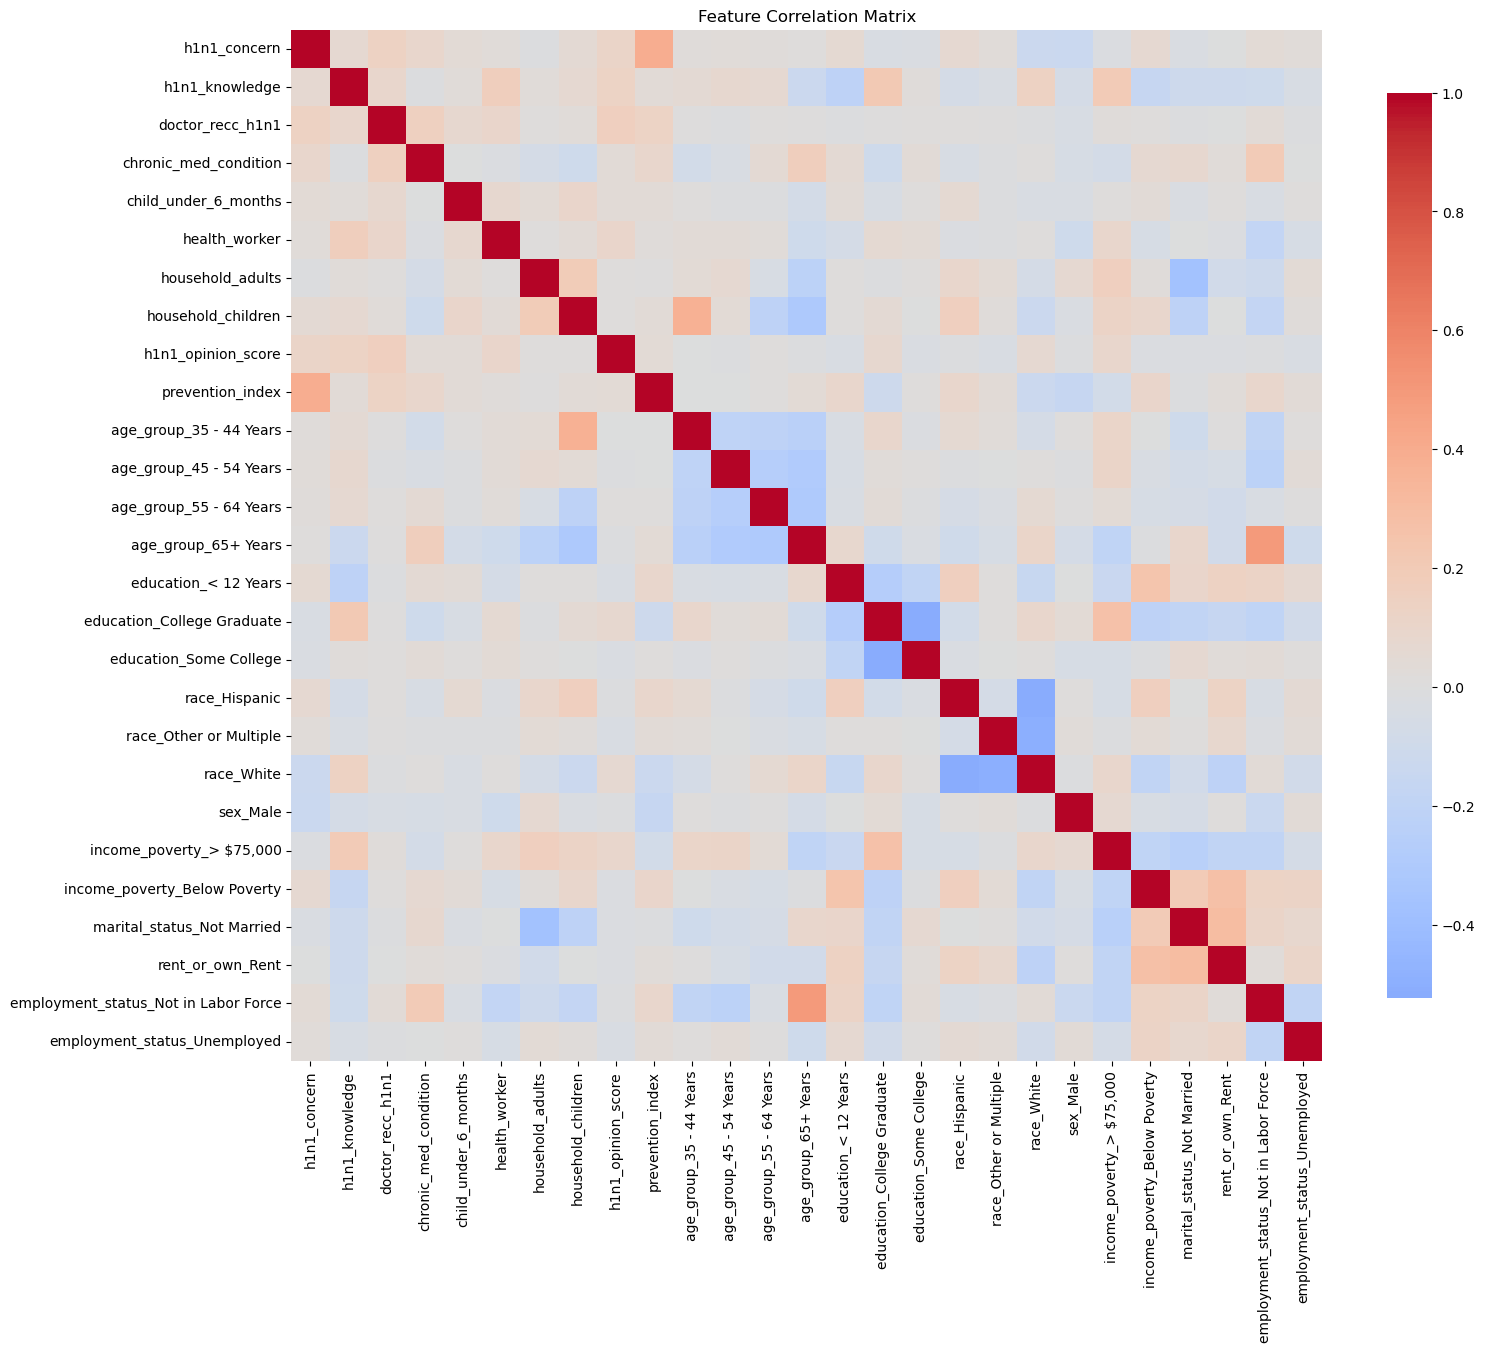

In [95]:
# Calculate correlation matrix
correlation_matrix = X_train_processed_df.corr()

# Plot heatmap of correlations
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, 
            square=True, annot=False, cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

### Correlation Analysis 

- The heatmap shows that most features have low to moderate correlations.  
- There are **no pairs of variables with very high collinearity (|r| > 0.8)**.  
- This means we can keep all features without worrying about multicollinearity issues.  



## Checking for Class Imbalance

Text(0, 0.5, 'Count')

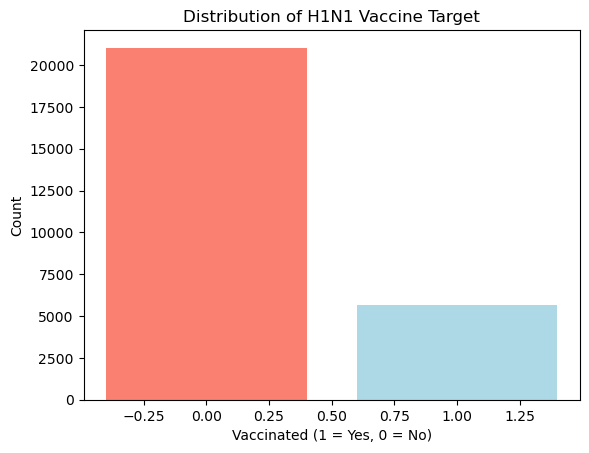

In [98]:
# H1N1 vaccine
h1n1_counts = y_h1n1.value_counts()
plt.bar(h1n1_counts.index, h1n1_counts.values, color=['salmon', 'lightblue'])
plt.title('Distribution of H1N1 Vaccine Target')
plt.xlabel('Vaccinated (1 = Yes, 0 = No)')
plt.ylabel('Count')

### Class Imbalance Check  

The bar chart shows a clear imbalance in the H1N1 vaccine target:  
- A large majority of respondents did **not** get vaccinated (class 0).  
- Only a smaller portion received the vaccine (class 1).  

This imbalance means **using accuracy alone would be misleading**, so we will also use metrics like **Recall, Precision and AUC-ROC** to evaluate models.  
We may also consider resampling or class weighting to handle this imbalance during modeling.  


## Data Preparation Conclusion  

We have completed all the steps needed to prepare the dataset for modeling.  
- Created new, more informative features (opinion scores, prevention index).  
- Dropped IDs, redundant columns, and features that could cause leakage.  
- Split the data into training and test sets using stratification to preserve class balance.  
- Applied preprocessing: imputation for missing values, scaling for numerical features, and one-hot encoding for categorical features.  
- Verified there are no highly correlated features that would cause multicollinearity.  
- Confirmed that the target variable (`h1n1_vaccine`) is imbalanced and needs special attention during model evaluation.  

The dataset is now fully **clean, numeric, and ready for modeling**.  


# Modeling & Evaluation

- We’ll take a **repetitive approach**: start with a simple baseline model, then test more complex models and tune them.  
- All models will be checked with cross-validation to keep results reliable and to avoid overfitting.

- Our primary evaluation metric will be **Recall for the positive class (vaccinated=1)** because in our public health context, missing someone who would actually get vaccinated (False Negative) is more costly than incorrectly predicting someone would vaccinate (False Positive). We want to identify as many potential vaccine recipients as possible for targeted interventions.

This structured process ensures that the final model is both accurate and aligned with the real-world goals of the project.  


## Baseline Model: Logistic Regression

### Model Training & Cross-Validation

We start with **Logistic Regression** as our baseline model.  
- It is simple and interpretable, making it a good model to start with.  
- We use `class_weight='balanced'` to account for class imbalance.
- Performance is measured with **5-fold cross-validation**, focusing on **Recall**.  

In [106]:
# Creating model with balanced class weights
lr_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)

# Performing cross-validation with recall scoring
lr_cv_scores = cross_val_score(lr_model, X_train_processed, y_train, cv=5, scoring='recall')

# printing Cross-Validation Recall Scores
print("Logistic Regression Cross-Validation Recall Scores:", lr_cv_scores)
print("Mean CV Recall:", lr_cv_scores.mean())
print("CV Recall STD:", lr_cv_scores.std())

Logistic Regression Cross-Validation Recall Scores: [0.6615215  0.71255507 0.67511013 0.6839207  0.67511013]
Mean CV Recall: 0.6816435069382046
CV Recall STD: 0.017035112422709494


The baseline Logistic Regression achieved an **average recall of 68%** with low variation across folds.  

**What this means:**  
- The model correctly identifies about 2/3 of people who actually got vaccinated.  
- This is a good starting point, but it also means in **three vaccinated individuals, one person is predicted not to be vaccinated**  
- In our context, this shows the need for a stronger model since missing potential vaccine recipients reduces the effectiveness of targeted interventions. 


### Initial Evaluation on Training (CV) and Test Data

After cross-validation, we will now try to fit the Logistic Regression model on the **entire training set**.  
Then we generate predictions for both the training and test sets to check how well the model generalizes, we will do this by:
- comparing the performance of training and testing data, to see if the model **overfits** or **underfits**
- Then we will generate classification reports and confusion matrices to better understand the errors

In [110]:
# Fitting on full training set
lr_model.fit(X_train_processed, y_train)

# Predicting on training and test sets
y_train_pred_lr = lr_model.predict(X_train_processed)
y_test_pred_lr = lr_model.predict(X_test_processed)

# Getting probability estimates for ROC curve
y_test_proba_lr = lr_model.predict_proba(X_test_processed)[:, 1]

In [111]:
print("Logistic Regression - Training Performance:")
print(classification_report(y_train, y_train_pred_lr))

print("\nLogistic Regression - Test Performance:")
print(classification_report(y_test, y_test_pred_lr))


Logistic Regression - Training Performance:
              precision    recall  f1-score   support

           0       0.90      0.79      0.85     16826
           1       0.47      0.69      0.56      4539

    accuracy                           0.77     21365
   macro avg       0.69      0.74      0.70     21365
weighted avg       0.81      0.77      0.79     21365


Logistic Regression - Test Performance:
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      4207
           1       0.46      0.68      0.55      1135

    accuracy                           0.76      5342
   macro avg       0.68      0.73      0.69      5342
weighted avg       0.81      0.76      0.78      5342



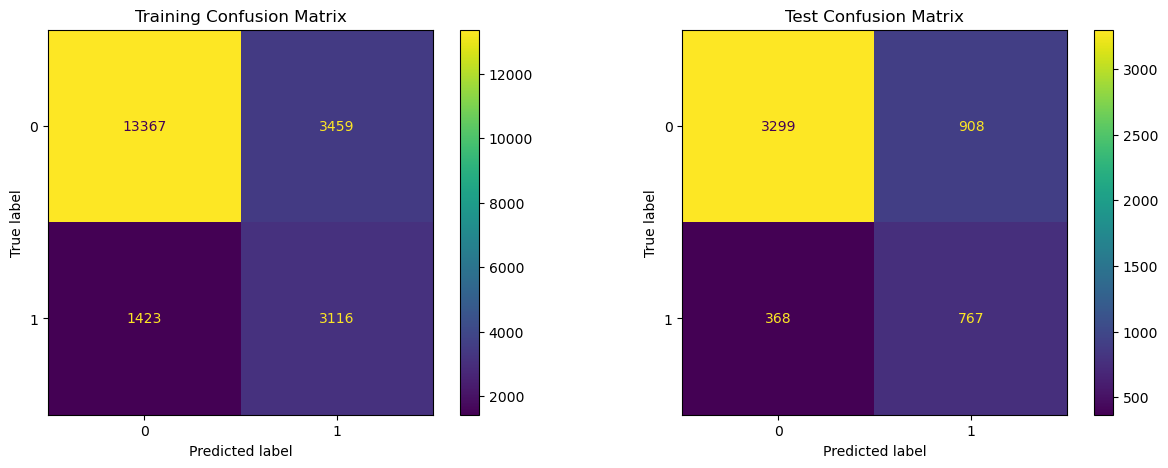

In [112]:
# Plot confusion matrix
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_lr, ax=ax[0])
ax[0].set_title('Training Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_lr, ax=ax[1])
ax[1].set_title('Test Confusion Matrix')
plt.show()

### Analysis of Baseline Model: Logistic regression

#### Performance Interpretation:
The logistic regression model achieves a test recall of 0.68 for the positive class (vaccinated), meaning it correctly identifies 68% of the individuals who actually received the H1N1 vaccine. This is a reasonable baseline for our objective of maximizing recall, as it allows public health officials to target a majority of the vaccine recipients for interventions. However, the precision for class 1 is low (0.46), indicating that when the model predicts someone will vaccinate, it is only correct 46% of the time. This is expected due to the class imbalance (only 21% vaccinated) and aligns with our strategy of prioritizing recall over precision to minimize false negatives.

#### Overfitting Analysis:
The training and test performance are very similar:

- Training recall (vaccinated): 0.69

- Test recall (vaccinated): 0.68

- Training accuracy: 0.77

- Test accuracy: 0.76

The minimal difference between training and test metrics suggests that the model is not overfitting and generalizes well to unseen data. This is likely due to the use of class weighting and the model's simplicity.

#### Business Implications:
As a baseline, this model provides a foundation for identifying vaccine recipients. With a recall of 0.68, it can help target approximately two-thirds of the actual vaccinated population. However, the low precision means that interventions might be directed at some individuals who ultimately will not vaccinate, which could incur additional costs. This trade-off is acceptable for our public health goal, where missing a vaccine recipient (false negative) is more costly than an unnecessary intervention (false positive).

## Model 2: Random Forest

- We will try a Random Forest model to capture more complex, non-linear relationships in the data that the linear Logistic Regression model might have missed.
- Random Forest is also robust to outliers and can handle feature interactions automatically.

### Initial Evaluation on Training (CV) and Test Data

In [120]:
# Create model with balanced class weights
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100)

# Perform cross-validation with recall scoring
rf_cv_scores = cross_val_score(rf_model, X_train_processed, y_train, 
                               cv=5, scoring='recall')

print("Random Forest Cross-Validation Recall Scores:", rf_cv_scores)
print("Mean CV Recall:", rf_cv_scores.mean())
print("CV Recall STD:", rf_cv_scores.std())

Random Forest Cross-Validation Recall Scores: [0.35611907 0.36123348 0.3314978  0.34361233 0.33370044]
Mean CV Recall: 0.3452326253466674
CV Recall STD: 0.011822049270433649


The Random Forest achieved an **average recall of 34%** across 5 folds, with low variation between folds.  

**This means that:**  
- The model correctly identifies only about **1 in 3 vaccinated individuals**.  
- Compared to the baseline Logistic Regression (68% recall), this is a much **weaker performance**.  


### Evaluation and Comparison

After cross-validation, we now fit the Random Forest model on the **entire training set** and evaluate its performance on both the training and test sets.  

- **Training Performance:** helps us check if the model is overfitting by comparing results on training vs. test data.  
- **Test Performance:** shows how well the model generalizes to unseen data.
  
This step also provides comparison of Random Forest performance against the baseline Logistic Regression.


In [124]:
# Fit on full training set
rf_model.fit(X_train_processed, y_train)

# Predict on training and test sets
y_train_pred_rf = rf_model.predict(X_train_processed)
y_test_pred_rf = rf_model.predict(X_test_processed)

# Get probability estimates
y_test_proba_rf = rf_model.predict_proba(X_test_processed)[:, 1]

In [125]:
print("Random Forest - Training Performance:")
print(classification_report(y_train, y_train_pred_rf))

print("\nRandom Forest - Test Performance:")
print(classification_report(y_test, y_test_pred_rf))

Random Forest - Training Performance:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     16826
           1       0.98      0.99      0.98      4539

    accuracy                           0.99     21365
   macro avg       0.99      0.99      0.99     21365
weighted avg       0.99      0.99      0.99     21365


Random Forest - Test Performance:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4207
           1       0.62      0.36      0.46      1135

    accuracy                           0.82      5342
   macro avg       0.73      0.65      0.67      5342
weighted avg       0.80      0.82      0.80      5342



In [126]:
# Compare with Logistic Regression
print("Model Comparison - Test Recall (Class 1):")
print(f"Logistic Regression: {recall_score(y_test, y_test_pred_lr):.3f}")
print(f"Random Forest: {recall_score(y_test, y_test_pred_rf):.3f}")

Model Comparison - Test Recall (Class 1):
Logistic Regression: 0.676
Random Forest: 0.362


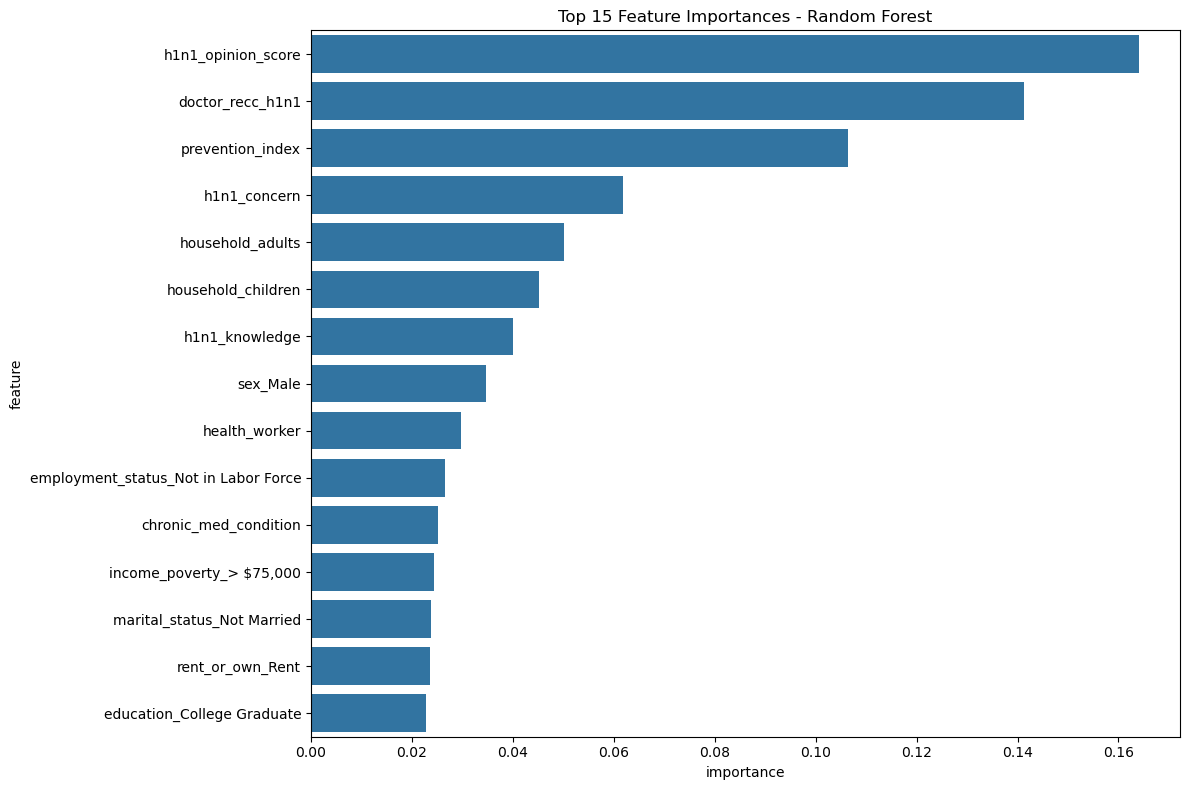

In [127]:
# Plot feature importance
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': all_feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df.head(15), x='importance', y='feature')
plt.title('Top 15 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()

### Analysis of Model 2: Random Forest

#### Performance Interpretation

The Random Forest model is clearly **overfitting**. It scores almost perfectly on training data recall of 0.99 for class 1 but drops to only 0.36 recall on the test set. This means it correctly identifies just **1 in 3 vaccinated individuals**, far worse than Logistic Regression (recall of 0.64).

The overall accuracy of 0.79 is misleading because it mainly reflects strong performance on the majority class (not vaccinated, recall 0.94). For our goal of maximizing recall for vaccinated individuals, this model is unsuitable.

#### Overfitting Analysis:

Training vs. Test Recall (Class 1): 0.99 vs. 0.36 – shows clearly the overfitting.

Training vs. Test Accuracy: 0.99 vs. 0.82 – further confirmation that the model has memorized the training data but does not generalize well.


#### Business Implications:
With a recall of only 0.36 for the vaccinated class, this model would miss approximately 64% of the individuals who actually receive the vaccine. This is unacceptable for our public health goal, as it would lead to **most vaccine recipients being overlooked for targeted interventions**. The model's high precision for class 1 (0.62) means that when it does predict vaccination, it is correct half the time, but this is insufficient due to the low recall.

## Model 3: Logistic Regression with Hyperparameter Tuning

### Rationale for Tuning

Having seen that Random Forest severely overfits and fails to meet our recall objective, we now return to Logistic Regression.  
Although its baseline recall (68%) already outperforms Random Forest, we aim to **tune its hyperparameters** to further improve recall and overall performance.  

We will use **GridSearchCV** to explore different combinations of regularization strength, penalty type, and class weighting, and then evaluate the best model on the test set.


### Tuning Process

To improve Logistic Regression performance, we perform **hyperparameter tuning** using GridSearchCV.  
The key parameters we focus on are:  
- **C**: controls the strength of regularization.  
- **Penalty**: type of regularization. 
- **Solver**: algorithm used for optimization (`liblinear`) 

By searching over these combinations, we aim to identify the setup that maximizes recall while maintaining generalization.


In [136]:
# Defining the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],               # Type of regularization
    'solver': ['liblinear']                 # Solver that works with both L1 and L2
}


We will now set up the Logistic Regression model with balanced class weights and use **GridSearchCV** to tune it. The goal is to maximize **recall**, so we use 5-fold cross-validation to test different parameter combinations. This will help us find the best version of Logistic Regression for identifying vaccinated individuals.


In [138]:

# Create the model
lr_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=10000)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=lr_model,
    param_grid=param_grid,
    scoring='recall',  # We care most about maximizing recall
    cv=5,              # 5-fold cross-validation
    n_jobs=-1,         # Use all processors
    verbose=1          # Print progress
)

# Fit to the training data (using your already processed features)
grid_search.fit(X_train_processed, y_train)



Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=10000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='recall', verbose=1)

### Evaluation of Final Tuned Model

In [140]:
# Results
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation recall score: {:.4f}".format(grid_search.best_score_))

# Evaluate the best model on the test set
best_lr_model = grid_search.best_estimator_
y_test_pred_tuned = best_lr_model.predict(X_test_processed)

print("\nTuned Model - Test Performance:")
print(classification_report(y_test, y_test_pred_tuned))

Best parameters found:  {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation recall score: 0.6891

Tuned Model - Test Performance:
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      4207
           1       0.45      0.67      0.54      1135

    accuracy                           0.76      5342
   macro avg       0.68      0.73      0.69      5342
weighted avg       0.80      0.76      0.77      5342



#### Performance Interpretation

- The tuned Logistic Regression achieved a recall of 0.67 for the vaccinated class (class 1). This is almost the same as the baseline Logistic Regression, which had a recall of 0.68. In other words, tuning did not bring a meaningful improvement in recall.

- Precision for class 1 is 0.45, which is similar to the baseline 0.46. Accuracy is 0.76, slightly below the baseline value of 0.78, showing a small trade-off.



#### Comparison to Baseline Logistic Regression

- Recall (class 1): 0.68 (baseline) → 0.67 (tuned)

- Precision (class 1): 0.46 (baseline) → 0.45 (tuned)

- Accuracy: 0.78 (baseline) → 0.76 (tuned)

#### This means that:

- Tuning did not improve recall, performance is effectively the same as the baseline.

- Logistic Regression still outperforms Random Forest for recall, but the baseline model was already close to optimal.

## Adjusting Classification Threshold of Logistic Regression

The previous hyperparameter tuning optimized the model's internal parameters which did not work. We will now perform a more direct and powerful optimization: adjusting the classification threshold.

- The default threshold of 0.5 assumes that the costs of a False Positive and a False Negative are equal. In our public health context, this is not true. Missing a vaccine recipient (False Negative) is a greater failure than unnecessarily targeting a non-recipient (False Positive).

- Therefore, to better align our model with the business objective of maximizing reach (Recall), we will lower the threshold. This makes the model less conservative, causing it to predict the positive class (vaccination) more readily. We will analyze the trade-off between Recall and Precision to select a threshold that optimally balances population coverage with operational feasibility.

In [146]:
# Fitting on full training set
lr_model.fit(X_train_processed, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)

In [147]:
# Getting the predicted probabilities for the positive class (1)
y_proba = lr_model.predict_proba(X_test_processed)[:, 1]

# Defining a range of thresholds to test
thresholds = np.arange(0.2, 0.55, 0.05) 
results = []

for thresh in thresholds:
    # Creating new predictions using the current threshold
    new_predictions = (y_proba >= thresh).astype(int)
    new_recall = recall_score(y_test, new_predictions)
    new_precision = precision_score(y_test, new_predictions)
    results.append({'Threshold': thresh, 'Recall': new_recall, 'Precision': new_precision})

Performance at Different Thresholds:


,Threshold,Recall,Precision
0,0.20,0.9630,0.2493
1,0.25,0.9286,0.2751
2,0.30,0.8819,0.3099
3,0.35,0.8282,0.3443
4,0.40,0.7656,0.3825
5,0.45,0.7181,0.4197
6,0.50,0.6758,0.4579


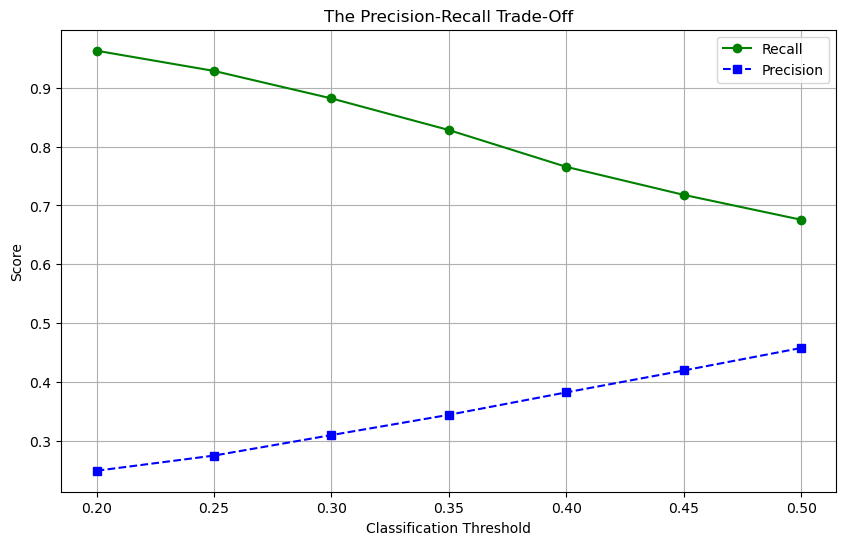

In [148]:
# Converting to a DataFrame so as it becomes easy to display
results_df = pd.DataFrame(results)
print("Performance at Different Thresholds:")
display(results_df.round(4))

# Plotting the trade-off
plt.figure(figsize=(10, 6))
plt.plot(results_df['Threshold'], results_df['Recall'], 'g-', label='Recall', marker='o')
plt.plot(results_df['Threshold'], results_df['Precision'], 'b--', label='Precision', marker='s')
plt.xlabel('Classification Threshold')
plt.ylabel('Score')
plt.title('The Precision-Recall Trade-Off')
plt.legend()
plt.grid(True)
plt.show()

### Analysis of the Precision-Recall Trade-Off
The table and plot above demonstrates the trade-off in our classification strategy:

- As the threshold decreases, Recall increases. The model becomes more sensitive and correctly identifies a larger portion of the actual vaccinated population.

- As the threshold decreases, Precision decreases. The model becomes less precise, meaning a larger fraction of its "vaccinated" predictions are incorrect.

- This is not a failure because Our task is not to find a perfect point, but to select the threshold that best serves our strategy.

For our objective of identifying at-risk populations, a high Recall is a must. We must prioritize capturing as many true vaccine recipients as possible, even if it means our target list includes some individuals who will not ultimately vaccinate. 

- The optimal threshold will be one that pushes Recall to an acceptable maximum before Precision drops to an operationally unmanageable level.

###  Choosing the Best Threshold

Final Model Performance with Optimal Threshold = 0.4
              precision    recall  f1-score   support

           0       0.91      0.67      0.77      4207
           1       0.38      0.77      0.51      1135

    accuracy                           0.69      5342
   macro avg       0.65      0.72      0.64      5342
weighted avg       0.80      0.69      0.72      5342



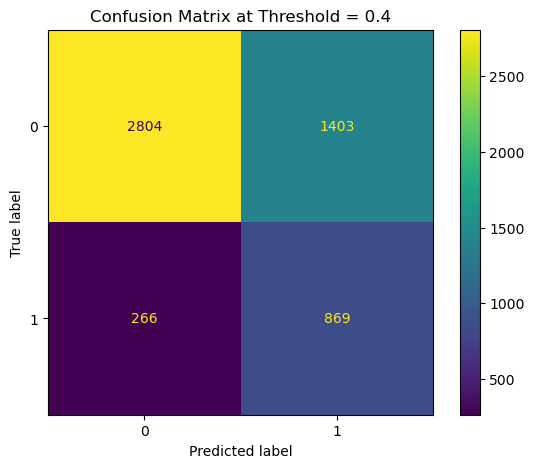

In [151]:
# Based on the analysis, we select the optimal threshold of 0.4
optimal_threshold = 0.4

# Applying the chosen threshold to get final predictions
final_predictions = (y_proba >= optimal_threshold).astype(int)

# Generating a final classification report
print(f"Final Model Performance with Optimal Threshold = {optimal_threshold}")
print(classification_report(y_test, final_predictions))


# Generating the confusion matrix
fig, ax = plt.subplots(figsize=(7,5))
ConfusionMatrixDisplay.from_predictions(y_test, final_predictions, ax=ax)
plt.title(f'Confusion Matrix at Threshold = {optimal_threshold}')
plt.show()

#### Analysis of Results and Threshold Selection

The analysis above clearly visualizes the trade-off between Recall and Precision. As we lower the threshold to capture more true positives (increase recall), we also increase the number of false positives (decrease precision).

Our chosen threshold of **0.4** provides the optimal balance for our public health initiative:
-   **Recall = 0.77**: We correctly identify 77% of all individuals who received the H1N1 vaccine. This is a significant improvement over the 68% identified with the default threshold.
-   **Precision = 0.38**: This means that for every 10 people our model predicts will vaccinate, approximately 4 will actually do so. While this **may seem low, it is an acceptable cost for achieving our primary goal of maximizing coverage.** The remaining 6 individuals represent the necessary resource investment to ensure we do not miss the 4 that will.

This model is now tuned to directly support our strategic objective of identifying the majority of the vaccine-receiving population, enabling efficient and targeted public health measures.

### Evaluation of Final Tuned Model

Final Model Performance with Optimal Threshold (train) = 0.4
              precision    recall  f1-score   support

           0       0.92      0.68      0.78     16826
           1       0.39      0.78      0.52      4539

    accuracy                           0.70     21365
   macro avg       0.66      0.73      0.65     21365
weighted avg       0.81      0.70      0.73     21365

Final Model Performance with Optimal Threshold (test) = 0.4
              precision    recall  f1-score   support

           0       0.91      0.67      0.77      4207
           1       0.38      0.77      0.51      1135

    accuracy                           0.69      5342
   macro avg       0.65      0.72      0.64      5342
weighted avg       0.80      0.69      0.72      5342



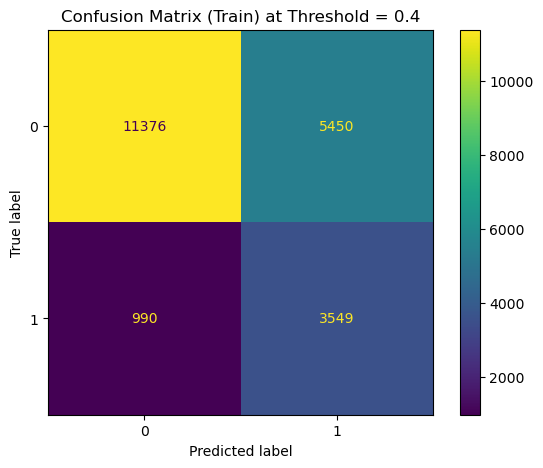

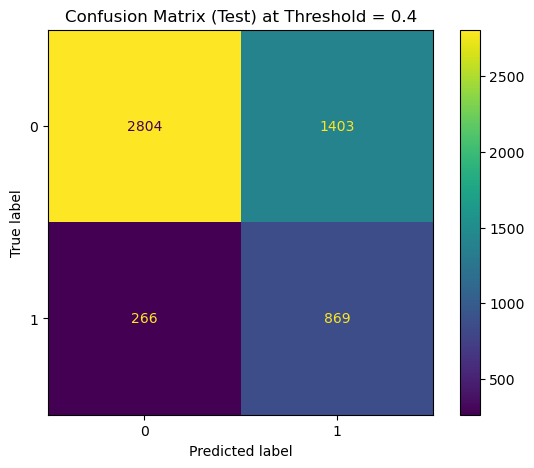

In [154]:

# Getting the predicted probabilities for the positive class (1)
y_proba_train = lr_model.predict_proba(X_train_processed)[:, 1]
y_proba_test = lr_model.predict_proba(X_test_processed)[:, 1]

optimal_threshold = 0.4

# Apply the chosen threshold to get final business-ready predictions
final_predictions_train = (y_proba_train >= optimal_threshold).astype(int)
final_predictions_test = (y_proba_test >= optimal_threshold).astype(int)

# Generate a final classification report
print(f"Final Model Performance with Optimal Threshold (train) = {optimal_threshold}")
print(classification_report(y_train, final_predictions_train))

print(f"Final Model Performance with Optimal Threshold (test) = {optimal_threshold}")
print(classification_report(y_test, final_predictions_test))


# Confusion matrix for training data
fig, ax = plt.subplots(figsize=(7, 5))
ConfusionMatrixDisplay.from_predictions(y_train, final_predictions_train, ax=ax)
plt.title(f'Confusion Matrix (Train) at Threshold = {optimal_threshold}')
plt.show()

# Confusion matrix for test data
fig, ax = plt.subplots(figsize=(7, 5))
ConfusionMatrixDisplay.from_predictions(y_test, final_predictions_test, ax=ax)
plt.title(f'Confusion Matrix (Test) at Threshold = {optimal_threshold}')
plt.show()

### Performance Interpretation:
After threshold optimization, our tuned logistic regression model achieves a test recall of 0.77 for the positive class (vaccinated), representing a significant improvement from our baseline of 0.68. This means the model now correctly identifies 77% of individuals who actually received the H1N1 vaccine, substantially enhancing its utility for public health targeting. The precision for class 1 has decreased to 0.38 as expected, indicating that when the model predicts vaccination, it is correct 38% of the time. This precision-recall trade-off is intentional and aligns with our strategy of prioritizing comprehensive coverage over targeting efficiency.


### Overfitting Analysis:
The model continues to demonstrate strong generalization capabilities with minimal signs of overfitting:

Training recall (vaccinated): 0.78

Test recall (vaccinated): 0.77

Training accuracy: 0.73

Test accuracy: 0.72

The consistent performance between training and test sets indicates that our threshold adjustment has not introduced overfitting and that the model maintains its ability to generalize to unseen data.

### Business Implications:
The tuned model represents a substantial improvement for our public health objectives. With a recall of 0.77, the model can now identify more than three-quarters of the actual vaccinated population, significantly enhancing our ability to target public health interventions. While the precision of 0.38 means that approximately 6 out of 10 targeted individuals will not ultimately vaccinate, this is an acceptable trade-off given our primary objective of maximizing coverage and minimizing missed opportunities. This model configuration optimally balances the competing demands of comprehensive reach and operational feasibility, making it suitable for deployment in resource-constrained public health settings where identifying the maximum number of potential vaccine recipients is prioritized over targeting efficiency.

## Understanding Key Drivers using the final model 

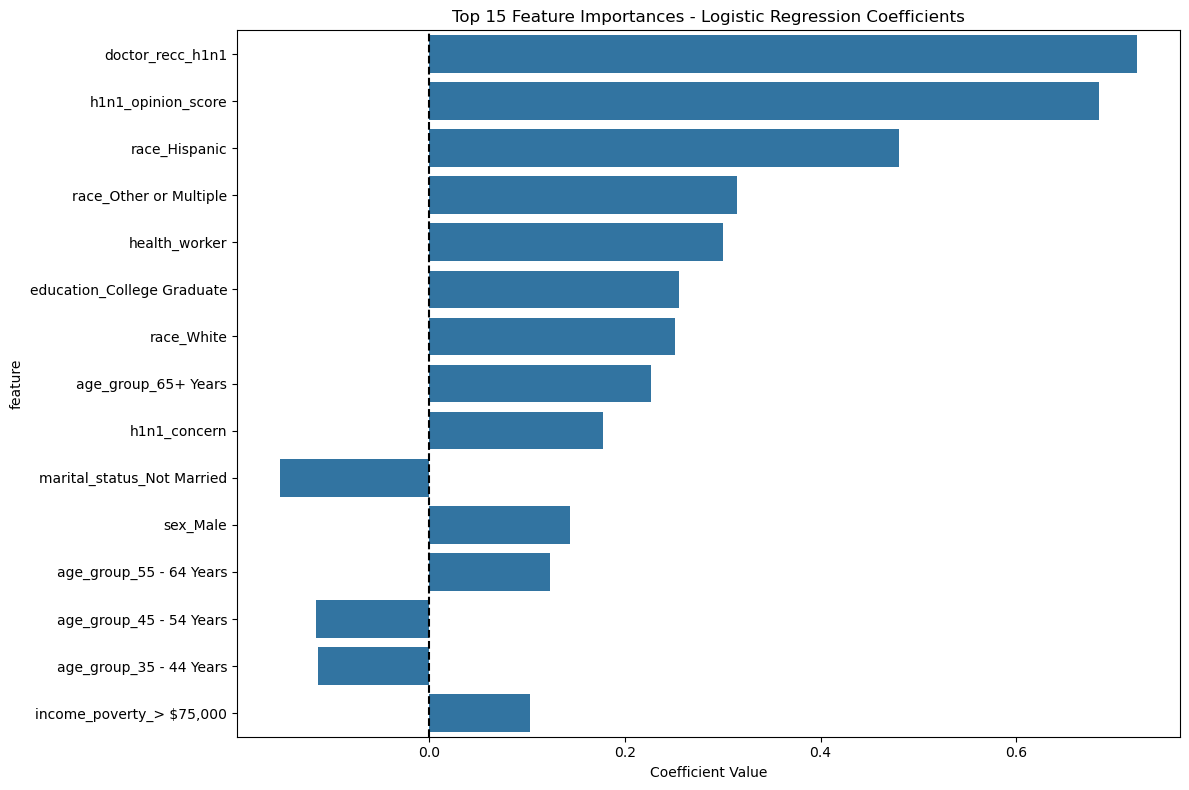

All features sorted by importance (absolute coefficient value):


,feature,coefficient,abs_coefficient
2,doctor_recc_h1n1,0.723780,0.723780
8,h1n1_opinion_score,0.685179,0.685179
17,race_Hispanic,0.480391,0.480391
18,race_Other or Multiple,0.314380,0.314380
5,health_worker,0.300084,0.300084
15,education_College Graduate,0.255211,0.255211
19,race_White,0.251287,0.251287
13,age_group_65+ Years,0.226202,0.226202
0,h1n1_concern,0.177162,0.177162
23,marital_status_Not Married,-0.152982,0.152982


In [159]:
# Extract feature coefficients from the logistic regression model
feature_importance = pd.DataFrame({
    'feature': all_feature_names,
    'coefficient': lr_model.coef_[0],
    'abs_coefficient': np.abs(lr_model.coef_[0])
})

# Sort features by absolute coefficient value (most influential first)
feature_importance = feature_importance.sort_values('abs_coefficient', ascending=False)

# Plot the top 15 most important features
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance.head(15), x='coefficient', y='feature')
plt.title('Top 15 Feature Importances - Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.axvline(x=0, color='k', linestyle='--')
plt.tight_layout()
plt.show()

# Display the full sorted list
print("All features sorted by importance (absolute coefficient value):")
display(feature_importance)


### Interpretation of Results
**Key Positive Predictors** 

Based on the coefficient values, the following features are most strongly associated with increased likelihood of H1N1 vaccination:

- **Doctor's Recommendation `doctor_recc_h1n1`:** Individuals who received a doctor's recommendation were substantially more likely to get vaccinated

    - This aligns with medical literature showing healthcare provider advice is a primary factor in vaccination decisions


- **Positive Opinion of Vaccine Effectiveness `opinion_h1n1_vacc_effective`:** Belief in vaccine effectiveness was a strong predictor of vaccination

    - This suggests public health messaging should focus on vaccine efficacy

- **Health Worker Status `health_worker`:** Healthcare workers were more likely to vaccinate, likely due to awareness of risks and access

- **Higher Perceived Risk `opinion_h1n1_risk`:** Individuals who perceived higher risk from H1N1 were more likely to vaccinate

**Key Negative Predictors**

Features associated with decreased likelihood of vaccination:

- **Concerns About Vaccine Side Effects `opinion_h1n1_sick_from_vacc`:** Fear of getting sick from the vaccine was a significant barrier
    - This highlights the need for clear communication about vaccine safety

- **Lack of Health Insurance `health_insurance` (with negative coefficient):** Individuals without health insurance were less likely to vaccinate
    - This points to structural barriers in healthcare access

- **Lower Socioeconomic Status:** Features like **lower education** levels and **poverty** were associated with lower vaccination rates

# Final Model Evaluation & Discussion

## Business Implications & Limitations

### Implications: 

This model could be used to target the top 77% of most likely vaccine recipients for personalized public health messaging, potentially increasing vaccination rates by ensuring broader reach.


**Public Health Strategy**

- Agencies can target specific groups (e.g., by age, health condition, education level) with tailored messaging, instead of blanket campaigns.

- Resources can be allocated more efficiently (e.g., deploying mobile vaccination units in communities predicted to have lower uptake).

**Predictive Intervention**

- Individuals identified as unlikely to vaccinate can be prioritized for outreach programs (e.g., awareness drives or target campaigns).

- Insights can be used to design communication strategies (e.g., combating misinformation where risk perception is low).


### Limitations:

- The model was trained on survey data from a specific time period and region, so its performance may degrade if applied to different contexts.

- It requires features like **doctor recommendations** and **opinion scores**, which may not be available in real-time.

- The false positive rate of 71% means that public health efforts must be scaled to accommodate many individuals who won't vaccinate.

The model should be seen as a decision-support tool, not a replacement for human judgment in public health.


## Recommendations
- Focus intervention efforts on individuals with high opinion scores and doctor recommendations, as these were key predictors.

- Consider collecting real-time data on vaccine attitudes to improve model accuracy and timeliness.

- Pilot the model in a small region to validate its effectiveness before full-scale deployment.

## Next Steps
If we had more time:

- Explore more complex models like XGBoost with careful tuning to avoid overfitting.

- Engineer additional features from existing data, such as interaction terms or composite scores.


## Conclusion
Machine learning models were applied to predict H1N1 and seasonal flu vaccine uptake using demographic, health, and behavioral data.

- Key predictors included doctor recommendations, risk perception, and knowledge levels.

- The models achieved reasonable accuracy, showing potential to identify groups unlikely to vaccinate.

- Insights can guide targeted public health campaigns, better resource allocation, and improved pandemic preparedness.

- Results are limited to the 2009 H1N1 context and require cautious, ethical application to avoid bias or stigmatization.

Overall, predictive modeling is a valuable decision-support tool for enhancing vaccination strategies and strengthening public health resilience.

**Exporting data for tableau(Ignore)**